# 라이브러리 및 한글 폰트 설치

In [1]:
# 나눔글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,403 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
# bert score 설치
!pip install bert-score

     |████████████████████████████████| 59 kB 3.0 MB/s 
     |████████████████████████████████| 3.1 MB 8.4 MB/s 
     |████████████████████████████████| 596 kB 95.1 MB/s 
     |████████████████████████████████| 61 kB 716 kB/s 
     |████████████████████████████████| 3.3 MB 84.3 MB/s 
     |████████████████████████████████| 895 kB 59.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# rouge score 설치
!pip install rouge

# ROUGE score 예시

In [5]:
from rouge import Rouge

reference = '나는 사과를 먹는다'
sample1 = '나는 사과를 먹고 있다'
sample2 = '나는 사과를 한다'

import pandas as pd
rouge = Rouge()

# sample1
pd.DataFrame(rouge.get_scores(reference, sample1)[0])

,rouge-1,rouge-2,rouge-l
r,0.500000,0.333333,0.500000
p,0.666667,0.500000,0.666667
f,0.571429,0.400000,0.571429


In [83]:
# sample2
pd.DataFrame(rouge.get_scores(reference, sample2)[0])

,rouge-1,rouge-2,rouge-l
r,0.666667,0.5,0.666667
p,0.666667,0.5,0.666667
f,0.666667,0.5,0.666667


# BERT score 예시

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


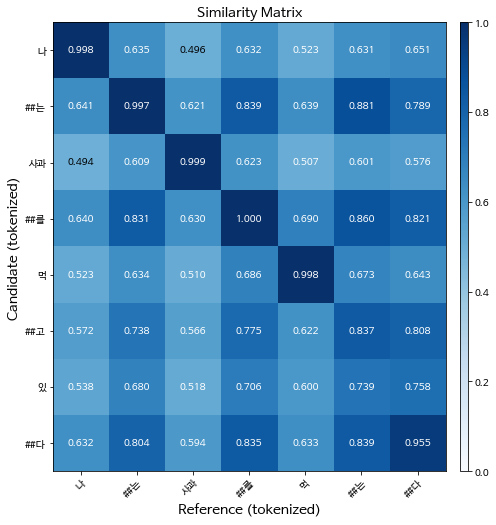

In [93]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

from bert_score import plot_example

# sample1
plot_example(sample1, reference, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers = 2, use_fast_tokenizer = True)

In [17]:
from bert_score import score
# sample1
P, R, F1 = score([sample1], [reference], model_type = 'monologg/koelectra-base-v2-discriminator', num_layers = 2, use_fast_tokenizer = True)
print(P, R, F1)

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([0.9427]) tensor([0.9753]) tensor([0.9587])


Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


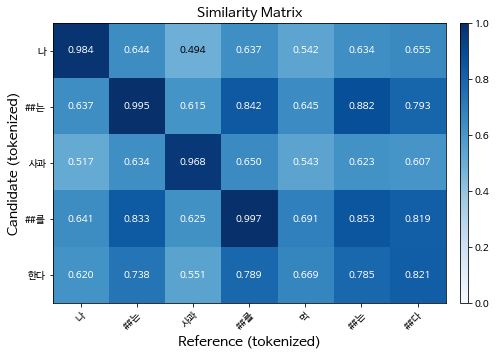

In [20]:
# sample1
plot_example(sample2, reference, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers = 2, use_fast_tokenizer = True)

In [19]:
from bert_score import score
# sample1
P, R, F1 = score([sample2], [reference], model_type = 'monologg/koelectra-base-v2-discriminator', num_layers = 2, use_fast_tokenizer = True)
print(P, R, F1)

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([0.9529]) tensor([0.9068]) tensor([0.9293])


# 모델별 성능비교

In [47]:
# 비교를 위한 기사 원문 데이터
import pandas as pd
validation = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/dataset/valid.csv')[['document','label']][20000:]
# 비교를 위한 기사 원문 txt 저장
validation['document'].to_csv('document.txt', header = 0, index = False)
validation

,document,label
20000,▲ '제3회 만천하스카이워크배 전국오픈 탁구대회'가 9~10일 단양국민체육센터에서 ...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
20001,서울시가 미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 실효성을 높이기 위해 ...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
20002,최근 제주도내 해수욕장에 상어가 나타나면서 제주특별자치도가 상어퇴치기 설치를 적극 ...,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
20003,신기호 기자최근 자유한국당 홍준표 전 대표가 문희상 국회의장이 정치세습을 한다고 주...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
20004,삼성SDS가 중국 스마트시티·클라우드·스마트물류 시장 개척에 본격적으로 나선다.삼성...,"삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
29995,김준(앞줄 왼쪽) SK이노베이션 총괄사장이 지난 10일 미국 라스베이거스에서 개최된...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
29996,'상상 커리어다이닝' 참가자 모집▲ 상상 커리어다이닝 참가자 모집 포스터.KT&G ...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
29997,지난 27일 방송된 SBS ‘백종원의 골목식당’이 평균 시청률 1부 6.7% 2부 ...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
29998,"제주신보송상열, 한의사·한의학 박사어제는 대학 입시의 최대 관문인 수학능력 시험이 ...",소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [48]:
# mt5_epoch3 240000
mt5 = pd.read_csv('/content/drive/MyDrive/cakd3_colab/3rd_project/mt5_small_final3.csv')[['Generated Text', 'Actual Text']][20000:]
mt5['Generated Text'].to_csv('generated_mt5.txt', header = 0, index = False)
mt5

,Generated Text,Actual Text
20000,탁구인들의 잔치를 축제로 만들기 위한 조치로 9~10일 이틀간 단양국민체육센터에서 ...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
20001,혜택을 폐지할 계획이다.,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
20002,곳곳에 상어가 나타나면서 제주특별자치도가 상어퇴치기 설치를 적극 검토하고 있다.,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
20003,의장이 문재인 대통령에게 청탁하기 위해서라고 아니 볼 수 없다며 반박하고 나섰다.,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
20004,및 중국 내 IT서비스 사업을 확대해 나갈 예정이다.,"삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
29995,그룹 통합 채용사이트와 별개의 채용사이트를 개설하며 SK이노베이션의 경영철학을 공유...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
29996,"상담 기회를 제공하는 '상상 커리어다이닝' 참가자를 모집한다고 25일 밝혔는데, 이...",내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
29997,음식에 자신있다는 사장님의 보리밥과 코다리찜을 시식하며 연이은 혹평을 쏟아내며 지난...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
29998,치료하는 우황청심원은 시중에서 판매되고 있어 일반인들에게도 친숙하다.,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [49]:
# ke_t5_epoch3 240000
ke_t5 = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/KE-T5_JONGU/ke-t5_final3.csv', index_col = 0)[20000:]
ke_t5['Generated Text'].to_csv('generated_ke_t5.txt', header = 0, index = False)
ke_t5

,Generated Text,Actual Text
20000,"큐브, 다마스버터플라이코리 팀이 각각 단체전과 단체전으로 예선전과 결승까지 진행한 ...",9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
20001,큐브와 함께 '승용차마일리지제'로 가입 전환을 유도해 자동차 이용 줄이기에 동참하고...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
20002,큐브에 설치하거나 일정 구역에 부표를 설치하는 방식으로 사용할 수 있는 상어퇴치기 ...,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
20003,"큐브에 '홍준표의 막말, 회복할 수 없는 절망을 안기다!!'라는 제목의 글을 올린 ...",지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
20004,"큐브와 사업협력 MOU를 체결하고 중국 내 스마트시티, 클라우드, 스마트물류 등의 ...","삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
29995,"큐브와 별도로 'SK이노베이션 채용 사이트'를 개설해 운영중이며, 이번 경력채용에서...",SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
29996,큐브에서 대학생 150명을 대상으로 취업 상담 기회를 제공하는 '상상 커리어다이닝'...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
29997,큐브 '백종원의 골목식당'이 조선업이 위기를 맞으며 지역 상권도 휘청이고 있는 '거...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
29998,큐브란 약 이름 속에 '마음을 맑게 가라앉혀 준다'는 효능이 담긴 우황(心)이란 약...,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [50]:
# et5_epoch3 240000
et5 = pd.read_csv('./drive/MyDrive/cakd3_colab/3rd_project/et5_240000_3_2.csv')
et5['Generated Text'].to_csv('generated_et5.txt', header = 0, index = False)
et5

,Generated Text,Actual Text
0,구의의 메카인 충북 단양군에서 9~10일 이틀간 '제3회 만천하스카이워크배 전국오픈...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
1,시는 미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 실효성을 높이기 위해 내년...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
2,특별자치도는 지난 8일 상어 1개체가 나타났으나 약 30분만인 12시 40분쯤 사라...,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
3,자유한국당 홍준표 전 대표가 문희상 국회의장이 정치특혜을 한다고 주장하자 안병용 의...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
4,표 대표가 공표한 '대외사업을 통한 혁신적 성장' 경영방침에 따라 삼성SDS가 중국...,"삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
9995,이노베이션이 그룹 통합 채용사이트와 따로 'SK이노베이션 채용 사이트'를 개설해 운...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
9996,&G는 다음달 7일까지 취업준비생 150명을 대상으로 취업상담 기회를 제공하는 '상...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
9997,업이 위기를 맞으며 지역 상권도 요동이고 있는 ‘거제도’ 첫 편으로 꾸며진 SBS ...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
9998,라는 소(Bos taurus Linne domesticus Gmelin)의 담낭에 ...,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [51]:
# et5_epoch8 290000
et5_epoch8 = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/eT5_epoch8/validation_final/eT5_train290000_epochs8.csv')
et5_epoch8['Generated Text'].to_csv('generated_et5_290000_epoch8.txt', header = 0, index = False)
et5_epoch8

,Generated Text,Actual Text
0,단양군에서 전국 탁구동호인 600여명이 참가한 가운데 9~10일 개최된 '제3회 만...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
1,시는 미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 실효성을 높이기 위해 내년...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
2,제주시 함덕해수욕장에서 상어 1개체가 나타나 약 30분만인 12시40분쯤 사라져 최...,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
3,최근 자유한국당 홍준표 전 대표가 문희상 국회의장이 정치 유해을 한다고 주장하자 안...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
4,"었다고 27일 삼성SDS는 중국 내의 스마트시티, 클라우드, 스마트물류 등의 사업분...","삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
9995,배터리 분야 등 전문 인력 확보에 SK이노베이션과 SK이노베이션 최고 경영진의 경영...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
9996,"KT&G는 25일, 내달 7일까지 취업을 준비하는 2~4학년 대학생 150명을 대상...",내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
9997,이 위기를 맞으며 지역 상권도 어려워지고 있는 '거제도' 첫 편으로 꾸며져 지난 2...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
9998,의 지속적인 수시 확대로 수능 중요도가 다소 완화됐지만 최근 정부의 정시 확대 방침...,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [52]:
# et5_epoch10 290000
et5_epoch10 = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/etri_et5_(290000*10)_extra.csv', index_col = 0)
et5_epoch10['Generated Text'].to_csv('generated_et5_290000_epoch10.txt', header = 0, index = False)
et5_epoch10

,Generated Text,Actual Text
0,의 메카 충북 단양군에서 탁구인들이 그동안 갈고 3 % 이상 날에 전국 탁구인들을 ...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
1,미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 실효성을 높이기 위해 서울시가 ...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
2,의 감각기관에 미세한 전기를 흘려보내 운영하고 일정 구역에 부표를 설치하는 방식으로...,"최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
3,전 대표가 패스트트랙 법안을 본회의에 부의하려는 것을 두고 페이스북을 통해 “문 의...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
4,·스마트물류 시장 개척을 위해 삼성SDS가 25일 서울 송파구 본사에서 중국 IT서...,"삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
9995,배터리 분야 등 전문 인력 확보에 SK이노베이션 총괄 사장의 인재 영입 철학을 엿볼...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
9996,좋은 취업상담 프로그램인 '상상 커리어이닝'은 KT&G가 대학생들을 위해 개발한 취...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
9997,의 주방점검 결과 '보리밥&코다리찜'집의 주방점검이 분당 최고 시청률 8.9%로 동...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
9998,에게 수능 당일 가족들이 꼭 챙겨주는 채소품 중 하나가 우황청심원( '마음을 맑게 ...,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [53]:
# et5_epoch12 290000
et5_epoch12 = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/eT5_epoch8/validation_final/eT5_train290000_epochs12.csv')
et5_epoch12['Generated Text'].to_csv('generated_et5_290000_epoch12.txt', header = 0, index = False)
et5_epoch12

,Generated Text,Actual Text
0,"단양군 탁구협회 회장, 전무이사, 경기이사 등 탁구동호인 600여명이 참석한 가운데...",9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
1,지 서울시 에너지시민협력과장은 미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 ...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
2,"은 아니지만 공격성이 높지 않다는 종류로 보이는 상어가 나타나자, 제주도는 상어퇴치...","최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
3,홍준표 전 대표는 지난달 30일 문희상 의장이 패스트트랙 법안을 본회의에 부의하려는...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
4,"영업과 사업수행을 맡아 중국 내 스마트시티, 클라우드, 스마트물류 등의 사업분야에서...","삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
9995,SK이노베이션이 지난해 4·4분기부터 '그룹 통합 채용사이트(skcareers.co...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
9996,&G는 25일 다음달 7일까지 취업을 준비하는 2~4학년 대학생 150명을 대상으로...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
9997,이 위기를 맞으며 지역 상권도 악영향을 받고 있는 '거제도' 첫 편을 지난 27일 ...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
9998,"의 우황은 심열로 인한 불안, 혼미 등 정신적 이상 그리고 간열로 인한 근육 마비나...",소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [54]:
# et5_epoch15 290000
et5_epoch15 = pd.read_csv('/content/drive/MyDrive/3차 프로젝트/summarization_et5_train_290000_extra_training_ver10_1.csv')
et5_epoch15['Generated Text'].to_csv('generated_et5_290000_epoch15.txt', header = 0, index = False)
et5_epoch15

,Generated Text,Actual Text
0,구의 메카 충북 단양군에서 탁구인들이 그동안 갈고 배운 자웅을 겨루는 '제3회 만천...,9~10일 이틀간 충북 단양국민체육센터에서 '제3회 만천하스카이워크배 전국오픈 탁구...
1,시는 미세먼지 저감을 위해 시행 중인 차량운행제한 정책의 실효성을 높이기 위해 내년...,"'승용차마일리지제'는 서울시가 지난 2017년 도입한 것으로, 미세먼지 저감을 위한..."
2,"면에서 상어 1개체가 발견되었으며, 최근 제주도내 해수욕장에 상어가 나타나면서 제주...","최근 제주도내 해수욕장에서 발생한 상어 출현으로, 제주특별자치도는 10일 상어퇴치기..."
3,홍준표 전 대표는 문희상 국회의장이 패스트트랙 법안을 본회의에 부의하려는 것을 두고...,지난달 30일 홍준표 자유한국당 전 대표가 문희상 의장이 패스트트랙 법안을 본회의에...
4,에서의 삼성 SDS의 대표 홍원표 대표는 지난 25일 서울 송파구 본사에서 중국 I...,"삼성SDS(대표 홍원표)는 지난 25일 서울 송파구 본사에서 시스템통합, IT아웃소..."
...,...,...
9995,이노베이션은 지난해 4·4분기부터 '그룹 통합 채용사이트'와 별도로 'SK이노베이션...,SK이노베이션은 김준 SK이노베이션 총괄 사장의 인재 영입 철학을 반영하여 작년 4...
9996,&G는 내달 7일까지 취업을 준비하는 2~4학년 대학생 150명을 대상으로 취업 상...,내달 7일까지 KT&G는 2~4학년 대학생 150명을 대상으로 취업 상담 프로그램 ...
9997,원이 조선업이 위기를 맞으며 지역 상권도 식품하고 있는 '거제도' 첫 편으로 꾸며진...,지난 27일 '백종원의 골목식당'은 '보리밥&코다리찜'의 주방점검 장면에서 동시간대...
9998,하는 자녀들에게 수능 당일 가족들이 꼭 챙겨주는 소지품 중 하나다.,소의 도축 과정에서 발견하여 약재로 쓰는 우황은 기본적으로 몸 안의 열을 치료하는 ...


In [55]:
# mt5 epoch3 240000
!bert-score -r document.txt -c generated_mt5.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.913283 R: 0.680443 F1: 0.779291


In [57]:
# ke_t5 epoch3 240000
!bert-score -r document.txt -c generated_ke_t5.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.907181 R: 0.701519 F1: 0.790763


In [58]:
# et5 epoch3 240000
!bert-score -r document.txt -c generated_et5.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.915299 R: 0.730273 F1: 0.812020


In [32]:
# et5 epoch8 290000
!bert-score -r document.txt -c generated_et5_290000_epoch8.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.904235 R: 0.718328 F1: 0.800287


In [59]:
# et5 epoch10 290000
!bert-score -r document.txt -c generated_et5_290000_epoch10.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.904901 R: 0.718471 F1: 0.800630


In [60]:
# et5 epoch12 290000
!bert-score -r document.txt -c generated_et5_290000_epoch12.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.907085 R: 0.727429 F1: 0.807033


In [61]:
# et5 epoch15 290000
!bert-score -r document.txt -c generated_et5_290000_epoch15.txt -m 'monologg/koelectra-base-v2-discriminator' -l 2 --use_fast_tokenizer

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
monologg/koelectra-base-v2-discriminator_L2_no-idf_version=0.3.10(hug_trans=4.12.5) P: 0.903528 R: 0.719717 F1: 0.800838


In [22]:
with open("document.txt") as f:
    refs = [line.strip() for line in f]

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


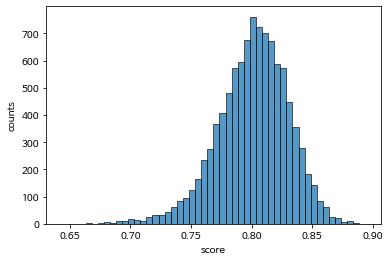

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from bert_score import score
with open("generated_et5_290000_epoch15.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_epoch15 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_epoch15, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


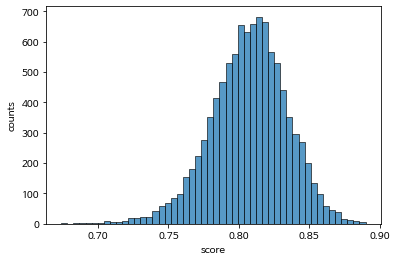

In [24]:
with open("generated_et5_290000_epoch12.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_epoch12 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_epoch12, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


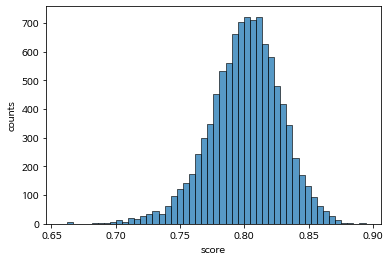

In [25]:
with open("generated_et5_290000_epoch10.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_epoch10 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_epoch10, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


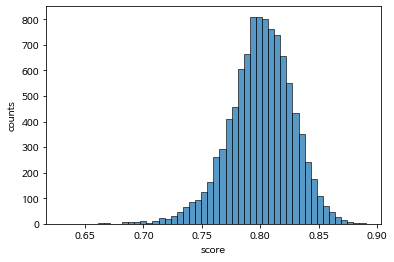

In [26]:
with open("generated_et5_290000_epoch8.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_epoch8 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_epoch8, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

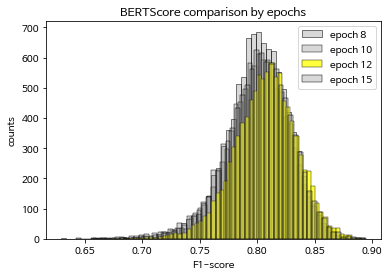

In [34]:
sns.histplot(F1_epoch8, bins=60, color = 'gray', alpha = 0.3, label = 'epoch 8')
sns.histplot(F1_epoch10, bins=60, color = 'gray', alpha = 0.3, label = 'epoch 10')
sns.histplot(F1_epoch12, bins=60, color = 'yellow', label = 'epoch 12')
sns.histplot(F1_epoch15, bins=60, color = 'gray', alpha = 0.3, label = 'epoch 15')
plt.xlabel("F1-score")
plt.ylabel("counts")
plt.title('BERTScore comparison by epochs')
plt.legend()
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


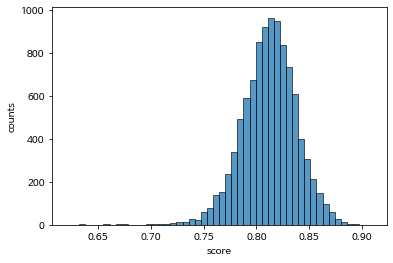

In [28]:
with open("generated_et5.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_et5 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_et5, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


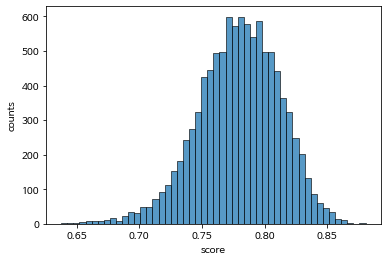

In [29]:
with open("generated_mt5.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_mt5 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_mt5, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

Some weights of the model checkpoint at monologg/koelectra-base-v2-discriminator were not used when initializing ElectraModel: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


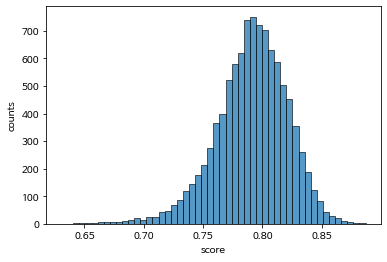

In [30]:
with open("generated_ke_t5.txt") as f:
    cands = [line.strip() for line in f]
P, R, F1_ket5 = score(cands, refs, model_type = 'monologg/koelectra-base-v2-discriminator', num_layers= 2, use_fast_tokenizer= True)
sns.histplot(F1_ket5, bins=50)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

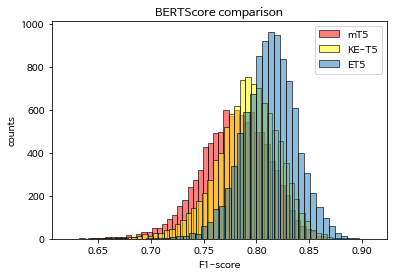

In [33]:
sns.histplot(F1_mt5, bins=50, color = 'red', alpha = 0.5, label = 'mT5')
sns.histplot(F1_ket5, bins=50, color = 'yellow', alpha = 0.5, label = 'KE-T5')
sns.histplot(F1_et5, bins=50, alpha = 0.5, label = 'ET5')
plt.xlabel("F1-score")
plt.ylabel("counts")
plt.title('BERTScore comparison')
plt.legend()
plt.show()

In [58]:
et5.fillna('', inplace = True)

In [73]:
mt5['text_len_gen'] = mt5['Generated Text'].apply(lambda x : len(x))
ke_t5['text_len_gen'] = ke_t5['Generated Text'].apply(lambda x : len(x))
et5['text_len_gen'] = et5['Generated Text'].apply(lambda x : len(x))
et5_epoch8['text_len_gen'] = et5_epoch8['Generated Text'].apply(lambda x : len(x))
et5_epoch10['text_len_gen'] = et5_epoch10['Generated Text'].apply(lambda x : len(x))
et5_epoch12['text_len_gen'] = et5_epoch12['Generated Text'].apply(lambda x : len(x))
et5_epoch15['text_len_gen'] = et5_epoch15['Generated Text'].apply(lambda x : len(x))

In [92]:
# 10자 미만 생성 문장 건 수
print('mt5:', len(mt5[mt5['text_len_gen'] < 10]))
print('ke_t5:', len(ke_t5[ke_t5['text_len_gen'] < 10]))
print('et5:', len(et5[et5['text_len_gen'] < 10]))
print('et5_epoch8:', len(et5_epoch8[et5_epoch8['text_len_gen'] < 10]))
print('et5_epoch10:', len(et5_epoch10[et5_epoch10['text_len_gen'] < 10]))
print('et5_epoch12:', len(et5_epoch12[et5_epoch12['text_len_gen'] < 10]))
print('et5_epoch15:', len(et5_epoch15[et5_epoch15['text_len_gen'] < 10]))

mt5: 77
ke_t5: 2
et5: 8
et5_epoch8: 3
et5_epoch10: 1
et5_epoch12: 0
et5_epoch15: 7


In [89]:
mt5[mt5['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
20028,없다며 반박했다.,김문수 전 경기도지사가 현 정권이 트럼프와 아베를 배척하는 '우리민족끼리' 친북 주...,9
20260,뒤를 이었다.,국회 행정안전위원회 소속 더불어민주당 소병훈 의원이 행정안전부로부터 제출받은 자료를...,7
20337,협력을 약속했다.,지난 10일 KT는 호텔의 운영 효율성을 높이기 위해 호텔 IT 솔루션 개발 및 제...,9
20365,것으로 나타났다.,농림축산식품부가 귀농·귀촌 2507가구를 설문조사한 ‘2018년 귀농·귀촌 실태조사...,9
20562,것으로 보인다.,국제 신용평가사인 S&P가 19일 '신용등급 하락 위험에 직면한 한국 기업'이라는 ...,8
...,...,...,...
28925,운항에 나선다.,"항공사들끼리 치열한 경쟁을 펼치는 가운데, 대형항공사인 대한항공과 아시아나항공은 아...",8
29065,인증을 받았다.,1일 대구시에 따르면 올포스킨피부과의원과 에필성형외과의원이 316개 인증기준과 1천...,8
29120,회의를 연다.,대구시가 ‘대구시 지방대학 및 지역균형인재 육성지원협의회’를 확대·구성하고 30일 ...,7
29448,것으로 나타났다.,통계청에 의하면 지난해 혼인건수가 7년 연속 감소하여 46년 만에 최저치를 기록한 ...,9


In [90]:
ke_t5[ke_t5['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
20403,큐브를 발간했다.,지난 3일 은행연합회를 통해 발간된 '은행연합회 90년사(1928~2018)'는 경...,9
28045,큐브를 출간했다.,경록이 출간발표한 '2020 공인중개사 기본서 민법및민사특별법' 교재는 역대 최대 ...,9


In [82]:
et5[et5['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
3067,,5.18 민주화운동 당시 계엄군이 공군 수송기로 '시체'를 광주에서 김해까지 수송하...,0
3237,.,지난달 21일 경기도 용인의 한 아파트에서 주민이 키우는 12kg짜리 폭스테리어에게...,1
3396,.,경북도의회가 일본 전범기업 수의계약 제한 조례안 상정을 유보하고 서울에서 열린 전국...,1
4144,,자유한국당 총선기획단 박맹우 사무총장에 따르면 한국당은 쇄신과 혁신을 바라는 국민의...,0
6452,.,순천 해룡선월농공단지 인근 주민들이 농공단지 시공업체가 농공단지 조성이 아닌 토석과...,1
6809,.,매년 5월이 되면 아직도 군인이 민간인을 학살한 경위가 명확히 드러나지 않는 현실을...,1
8669,,ADD라는 주의력 결핍증을 앓는 가수 박봄은 국제 택배를 통해 마약을 밀반입했다는 ...,0
9549,..,더불어민주당은 문재인 대통령과 도널드 트럼프 미국 대통령의 정상회담 결과에 대해' ...,2


In [85]:
et5_epoch8[et5_epoch8['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
1953,것이다.,20일 롤스로이스가 서울 청담동 도산대로에 '롤스로이스 부티크'를 오픈하며 접근성과...,4
3382,발표했다.,금융위원회에 따르면 년 5%대 고금리에 비과세 혜택으로 40만원 한도를 채운 병사는...,5
5423,것이다.,더불어민주당 김상희 의원이 식품의약품안전처로부터 받은 자료에 의하면 의료기기는 보건...,4


In [86]:
et5_epoch10[et5_epoch10['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
6283,에서 말했다.,하남 남한중이 23일 서울 SK핸드볼경기장에서 열린 제74회 전국종별 핸드볼선수권대...,7


In [87]:
et5_epoch12[et5_epoch12['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen


In [88]:
et5_epoch15[et5_epoch15['text_len_gen'] < 10]

,Generated Text,Actual Text,text_len_gen
3605,발표했다.,연매출 400억원에 달하는 요가복 브랜드 '안다르'의 20대 CEO 신애련이 오는 ...,5
3751,발표했다.,"2019년 맹동섭이 최우선 목표로 잡은 두 가지 타이틀은 ""올해 제네시스 대상을 차...",5
6198,된다.,오는 29일과 30일 서울 삼성동 코엑스 3층에서 문화체육관광부가 주최하는 관광분야...,3
6363,추진하겠다.,오는 16일 오전 10시 울산박물관 대강당에서 국내외 암각화 전문가 등 200여명이...,6
8132,던졌다은 5G,KT가 LTE만 되는 갤럭시 S10 단말기를 사면 추후 5G폰도 구매할 수 있는 ‘...,7
8493,식이다.,"차례상에 밥과 나물, 과일 외에 꼭 오르는 것이 소고기 찜과 탕, 전으로, 농촌진흥...",4
8922,말했다.,태영호 전 영국주재 북한공사는 25일 자신의 블로그에서 지난달 22일 주(駐)스페인...,4
